### Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D ,Dense

from keras.models import Sequential, Model
import IPython.display as ipd
import resampy
import glob

### Remove silent

In [8]:
MALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\males"
male_list = glob.glob(MALE_DATA + "\\*.wav")

In [9]:
male_list[0]

'D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\males\\0.wav'

In [10]:
y, sr = librosa.load(male_list[0])

2048
4.5351473922902495e-05


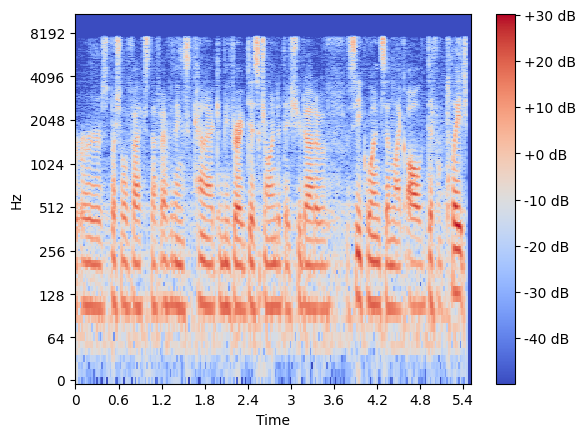

In [4]:
stft_1 = librosa.stft(y)
d = librosa.amplitude_to_db(np.abs(stft_1), ref=1)
data_spec = librosa.display.specshow(d,y_axis='log', sr=sr,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')

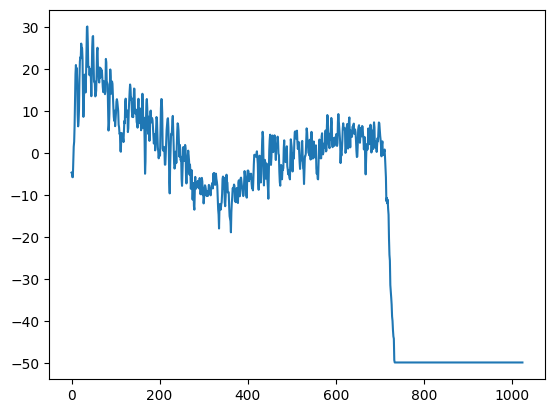

In [23]:
ls = []
for i in range ((1025)):
    ls.append(max(d[i]))
plt.plot(ls)

In [5]:
df = pd.DataFrame([[1,2], [3,4]])

In [6]:
df.to_json("D:\\VoiceClone\\temp.json")

In [7]:
new_df = pd.read_json("D:\\VoiceClone\\temp.json")
new_df

,0,1
0,1,2
1,3,4


In [9]:
def removeSilent(y, sr, top_db = 10):
    intervals = librosa.effects.split(y, top_db)
    tmp = y[intervals[0][0]:intervals[0]:[1]]
    for i in range(1, len(intervals)):
        tmp = np.concatenate((tmp, y[intervals[i][0]:intervals[i][1]]), axis=0)
    return tmp


In [1]:
def dataframe_to_json(data_frame, path):
    data_frame.to_json(path)

In [9]:
import soundfile as sf
y,sr = sf.read('D:/VoiceClone/OtherProject/VoxCeleb_gender/females/0.wav')

In [11]:
type(y)

numpy.ndarray